## Data Preprocessing & Cleaning

In [65]:
import pandas as pd

#Load Data
df = pd.read_csv('buth_kade_transactions.csv')
print(f"Data loaded successfully. Shape: {df.shape}")
print(df.head())

Data loaded successfully. Shape: (5076, 3)
  Transaction_ID                                              Items  \
0          T0001      Red Rice, Coconut Sambol, Chicken, Pol Sambol   
1          T0002                 Fried Rice, Chilli Paste, Gotukola   
2          T0003  Red Rice, Chilli Paste, Dried Fish, Mallum, Fr...   
3          T0004              Red Rice, Chicken, Fried Egg, Pumpkin   
4          T0005          String Hoppers, Devilled Chicken, Chicken   

            Time_Stamp  
0  2025-11-16 11:00 AM  
1  2025-11-16 11:00 AM  
2  2025-11-16 11:00 AM  
3  2025-11-16 11:00 AM  
4  2025-11-16 11:00 AM  


## Analyze missing values

In [66]:
print("Missing Values Analysis:")
print(f"Transaction_ID: {df['Transaction_ID'].isnull().sum()}")
print(f"Items: {df['Items'].isnull().sum()}")
print(f"Time_Stamp: {df['Time_Stamp'].isnull().sum()}")
print(f"Total: {df.isnull().sum().sum()}")

Missing Values Analysis:
Transaction_ID: 0
Items: 50
Time_Stamp: 26
Total: 76


## Handle Missing Values

In [67]:
df_cleaned = df.dropna(subset=['Items'])
df_cleaned['Time_Stamp'] = df_cleaned['Time_Stamp'].fillna(method='ffill')
print(f"Rows dropped: {len(df) - len(df_cleaned)}")
print(f"Final shape: {df_cleaned.shape}")

Rows dropped: 50
Final shape: (5026, 3)


C:\Users\Anujan\AppData\Local\Temp\ipykernel_33056\3341206190.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['Time_Stamp'] = df_cleaned['Time_Stamp'].fillna(method='ffill')
C:\Users\Anujan\AppData\Local\Temp\ipykernel_33056\3341206190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time_Stamp'] = df_cleaned['Time_Stamp'].fillna(method='ffill')


## Standardization

In [68]:
df_cleaned['Items_List'] = df_cleaned['Items'].str.split(', ')

item_mapping = {
    'Fried Fish': 'Fish', 'Fish Ambul Thiyal': 'Fish', 'Dried Fish': 'Fish',
    'Chicken Curry': 'Chicken', 'pol_sambol': 'Pol Sambol', 
    'Coconut Sambol': 'Pol Sambol'
}

df_cleaned['Items_Standardized'] = df_cleaned['Items_List'].apply(
    lambda items: [item_mapping.get(item.strip(), item.strip()) for item in items] if items else []
)

print(f"Standardization complete. Sample:")
print(df_cleaned['Items_Standardized'].head(3).tolist())

C:\Users\Anujan\AppData\Local\Temp\ipykernel_33056\4258934648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Items_List'] = df_cleaned['Items'].str.split(', ')


Standardization complete. Sample:
[['Red Rice', 'Pol Sambol', 'Chicken', 'Pol Sambol'], ['Fried Rice', 'Chilli Paste', 'Gotukola'], ['Red Rice', 'Chilli Paste', 'Fish', 'Mallum', 'Fried Egg']]


C:\Users\Anujan\AppData\Local\Temp\ipykernel_33056\4258934648.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Items_Standardized'] = df_cleaned['Items_List'].apply(


## Tranformation (one-hot encoding)

In [69]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(df_cleaned['Items_Standardized']).transform(df_cleaned['Items_Standardized'])
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print(f"One-Hot Encoded Matrix: {df_encoded.shape}")
print(f"Unique items ({len(te.columns_)}): {sorted(te.columns_)}")

One-Hot Encoded Matrix: (5026, 20)
Unique items (20): ['Brinjal Moju', 'Chicken', 'Chilli Paste', 'Chop Suey', 'Devilled Chicken', 'Dhal', 'Fish', 'Fried Egg', 'Fried Rice', 'Gotukola', 'Jackfruit', 'Kiri Hodi', 'Mallum', 'Papadam', 'Pol Sambol', 'Potato Tempered', 'Pumpkin', 'Red Rice', 'String Hoppers', 'White Rice']


## Feature Engineering

In [70]:
rice_based = ['Red Rice', 'White Rice', 'Fried Rice']
noodle_based = ['String Hoppers']

def classify_base_starch(items):
    if any(item in rice_based for item in items): return 'Rice-Based'
    if any(item in noodle_based for item in items): return 'Noodle-Based'
    return 'Other'

df_cleaned['Base_Starch'] = df_cleaned['Items_Standardized'].apply(classify_base_starch)
print(f"\nBase Starch Distribution:\n{df_cleaned['Base_Starch'].value_counts()}")


Base Starch Distribution:
Base_Starch
Rice-Based      3752
Noodle-Based    1274
Name: count, dtype: int64


C:\Users\Anujan\AppData\Local\Temp\ipykernel_33056\639037565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Base_Starch'] = df_cleaned['Items_Standardized'].apply(classify_base_starch)


In [71]:
import pandas as pd

df_cleaned['Time_Stamp'] = pd.to_datetime(df_cleaned['Time_Stamp'], format='%Y-%m-%d %I:%M %p')
df_cleaned['Hour'] = df_cleaned['Time_Stamp'].dt.hour

df_cleaned['Time_Bin'] = df_cleaned['Hour'].apply(
    lambda h: 'Early Lunch' if h < 12 else 'Peak Lunch' if h < 13 else 'Late Lunch'
)

print(f"Time Binning:\n{df_cleaned['Time_Bin'].value_counts()}")

Time Binning:
Time_Bin
Late Lunch     2157
Peak Lunch     1487
Early Lunch    1382
Name: count, dtype: int64


C:\Users\Anujan\AppData\Local\Temp\ipykernel_33056\1249108719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time_Stamp'] = pd.to_datetime(df_cleaned['Time_Stamp'], format='%Y-%m-%d %I:%M %p')
C:\Users\Anujan\AppData\Local\Temp\ipykernel_33056\1249108719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Hour'] = df_cleaned['Time_Stamp'].dt.hour
C:\Users\Anujan\AppData\Local\Temp\ipykernel_33056\1249108719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [72]:
non_veg_items = ['Chicken', 'Devilled Chicken', 'Fish', 'Fried Egg']

df_cleaned['Is_Vegetarian'] = df_cleaned['Items_Standardized'].apply(
    lambda items: not any(item in non_veg_items for item in items)
)

print(f"Vegetarian Distribution:\n{df_cleaned['Is_Vegetarian'].value_counts()}")

Vegetarian Distribution:
Is_Vegetarian
False    4082
True      944
Name: count, dtype: int64


C:\Users\Anujan\AppData\Local\Temp\ipykernel_33056\2554549092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Is_Vegetarian'] = df_cleaned['Items_Standardized'].apply(


## Customer Segmentation 

In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(df_encoded)

print(f"Cluster Distribution:\n{df_cleaned['Cluster'].value_counts().sort_index()}")
for i in range(3):
    count = len(df_cleaned[df_cleaned['Cluster'] == i])
    print(f"Cluster {i}: {count} ({count/len(df_cleaned)*100:.1f}%)")

Cluster Distribution:
Cluster
0    1274
1    2474
2    1278
Name: count, dtype: int64
Cluster 0: 1274 (25.3%)
Cluster 1: 2474 (49.2%)
Cluster 2: 1278 (25.4%)


C:\Users\Anujan\AppData\Local\Temp\ipykernel_33056\682211537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(df_encoded)


## Visualizations & Insights among clusters

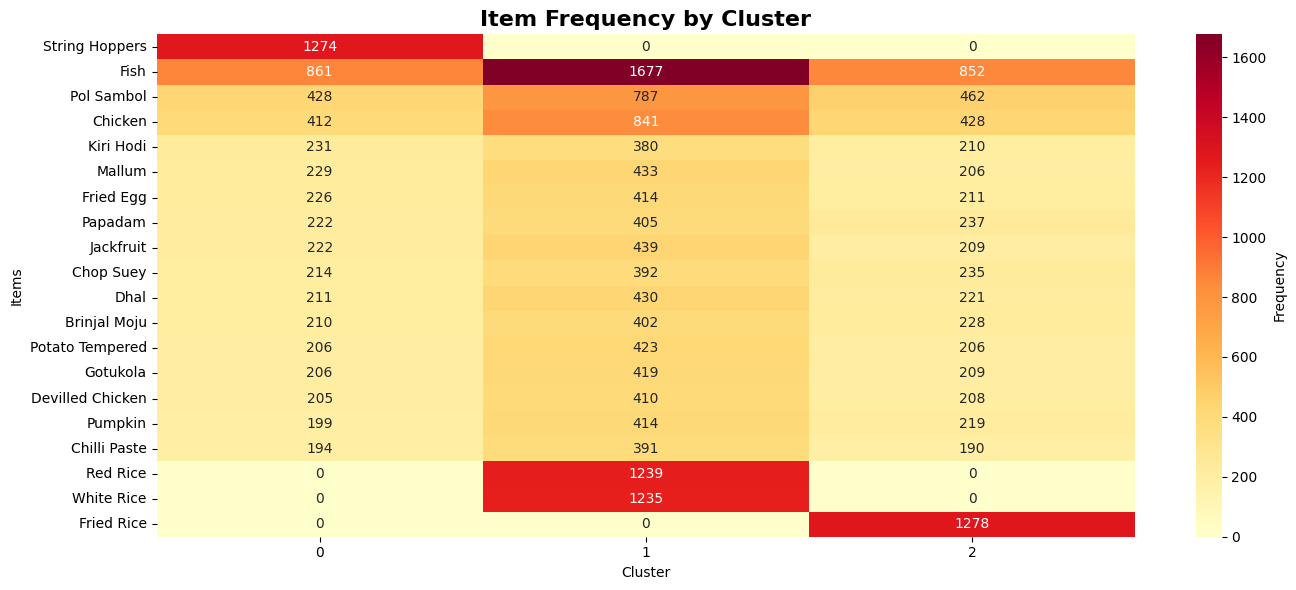

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_item_freq = []
for cluster_id in sorted(df_cleaned['Cluster'].unique()):
    cluster_items = [item for items_list in df_cleaned[df_cleaned['Cluster'] == cluster_id]['Items_Standardized'] 
                     for item in items_list]
    cluster_item_freq.append(pd.Series(cluster_items).value_counts().to_dict())

cluster_df = pd.DataFrame(cluster_item_freq, index=sorted(df_cleaned['Cluster'].unique())).fillna(0).astype(int)

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_df.T, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Frequency'})
plt.title('Item Frequency by Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Cluster'); plt.ylabel('Items')
plt.tight_layout(); plt.show()

#### Cluster 0: String Hopper Enthusiasts (Noodle-Based Lovers)
- **Size**: 1274 transactions (~25%)
- **Top 5 Items**:
  1. Fish: 691 times
  2. Pol Sambol: 381 times
  3. Chicken: 372 times
  4. String Hoppers: 335 times
  5. Fried Rice: 321 times
- **Dominant Base Starch**: Noodle-Based (1274 transactions)
- **Vegetarian Transactions**: 225 
- **Most Active Time**: Late Lunch 
- **Protein Preferences**:
  - Fish: 691 times
  - Chicken: 372 times
  - Fried Egg: 228 times
  - Devilled Chicken: 209 times

#### Cluster 1: Rice Lovers (Balanced Meat Eaters)
- **Size**: 2474 transactions (~50~%)
- **Top 5 Items**:
  1. Fish: 1345 times
  2. Pol Sambol: 764 times

#### Vegetarian Behavior:
- all clusters have ~ 20% vegetarian transactions


## Segmented Apriori with Hyperparameter Tuning

In [75]:
from mlxtend.frequent_patterns import apriori, association_rules

support_values = [0.025, 0.05, 0.07]
confidence_values = [0.4, 0.5, 0.6]
tuning_results = {}

print("Hyperparameter Tuning")
print("="*70)

for cluster_id in sorted(df_cleaned['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    cluster_encoded = df_encoded.set_index(df_cleaned.index).loc[df_cleaned[df_cleaned['Cluster'] == cluster_id].index]
    tuning_results[cluster_id] = []
    
    for sup in support_values:
        for conf in confidence_values:
            freq_items = apriori(cluster_encoded, min_support=sup, use_colnames=True)
            rules_count = len(association_rules(freq_items, metric='confidence', min_threshold=conf)[lambda x: x['lift'] > 1]) if len(freq_items) > 0 else 0
            tuning_results[cluster_id].append({'support': sup, 'confidence': conf, 'rules': rules_count})
            print(f"  sup={sup:.2f}, conf={conf:.2f} → {rules_count} rules")

Hyperparameter Tuning

Cluster 0:
  sup=0.03, conf=0.40 → 3 rules
  sup=0.03, conf=0.50 → 3 rules
  sup=0.03, conf=0.60 → 0 rules
  sup=0.05, conf=0.40 → 0 rules
  sup=0.05, conf=0.50 → 0 rules
  sup=0.05, conf=0.60 → 0 rules
  sup=0.07, conf=0.40 → 0 rules
  sup=0.07, conf=0.50 → 0 rules
  sup=0.07, conf=0.60 → 0 rules

Cluster 1:
  sup=0.03, conf=0.40 → 46 rules
  sup=0.03, conf=0.50 → 46 rules
  sup=0.03, conf=0.60 → 0 rules
  sup=0.05, conf=0.40 → 19 rules
  sup=0.05, conf=0.50 → 19 rules
  sup=0.05, conf=0.60 → 0 rules
  sup=0.07, conf=0.40 → 19 rules
  sup=0.07, conf=0.50 → 19 rules
  sup=0.07, conf=0.60 → 0 rules

Cluster 2:
  sup=0.03, conf=0.40 → 0 rules
  sup=0.03, conf=0.50 → 0 rules
  sup=0.03, conf=0.60 → 0 rules
  sup=0.05, conf=0.40 → 0 rules
  sup=0.05, conf=0.50 → 0 rules
  sup=0.05, conf=0.60 → 0 rules
  sup=0.07, conf=0.40 → 0 rules
  sup=0.07, conf=0.50 → 0 rules
  sup=0.07, conf=0.60 → 0 rules


c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\Anujan\Desktop\Apri

In [76]:
print("Best Hyperparameters:")
print("="*70)

best_params = {}
for cluster_id in sorted(tuning_results.keys()):
    best = max(tuning_results[cluster_id], key=lambda x: x['rules'])
    best_params[cluster_id] = best
    print(f"\nCluster {cluster_id}: Support={best['support']}, Confidence={best['confidence']}, Rules={best['rules']}")

Best Hyperparameters:

Cluster 0: Support=0.025, Confidence=0.4, Rules=3

Cluster 1: Support=0.025, Confidence=0.4, Rules=46

Cluster 2: Support=0.025, Confidence=0.4, Rules=0


In [77]:
print("Final Apriori Execution")
print("="*70)

final_results = {}

for cluster_id in sorted(df_cleaned['Cluster'].unique()):
    cluster_encoded = df_encoded.set_index(df_cleaned.index).loc[df_cleaned[df_cleaned['Cluster'] == cluster_id].index]
    best = best_params[cluster_id]
    
    if best['support'] is None or best['confidence'] is None:
        final_results[cluster_id] = {'itemsets': None, 'rules': None, 'params': None}
        continue
    
    freq_items = apriori(cluster_encoded, min_support=best['support'], use_colnames=True)
    
    if len(freq_items) > 0:
        rules = association_rules(freq_items, metric='confidence', min_threshold=best['confidence'])
        rules_filtered = rules[rules['lift'] > 1.0].sort_values('lift', ascending=False)
        final_results[cluster_id] = {'itemsets': freq_items, 'rules': rules_filtered, 'params': best}
        print(f"\nCluster {cluster_id}: {len(freq_items)} itemsets, {len(rules_filtered)} rules (lift>1)")
    else:
        final_results[cluster_id] = {'itemsets': None, 'rules': None}
        print(f"\nCluster {cluster_id}: No rules generated")

Final Apriori Execution


c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)



Cluster 0: 201 itemsets, 3 rules (lift>1)

Cluster 1: 167 itemsets, 46 rules (lift>1)

Cluster 2: 199 itemsets, 0 rules (lift>1)


c:\Users\Anujan\Desktop\Apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [78]:
print("Top 5 Rules per Cluster")
print("="*70)

for cluster_id in sorted(final_results.keys()):
    print(f"\nCluster {cluster_id}:")
    rules = final_results[cluster_id].get('rules')
    
    if rules is not None and len(rules) > 0:
        for _, row in rules.head(5).iterrows():
            ant = ', '.join(list(row['antecedents']))
            con = ', '.join(list(row['consequents']))
            print(f"  {ant} → {con}")
            print(f"    Support: {row['support']:.4f}, Confidence: {row['confidence']:.4f}, Lift: {row['lift']:.4f}")
    else:
        print("  No strong rules")

Top 5 Rules per Cluster

Cluster 0:
  Pol Sambol, Dhal → Fish
    Support: 0.0259, Confidence: 0.5593, Lift: 1.0093
  String Hoppers, Pol Sambol, Dhal → Fish
    Support: 0.0259, Confidence: 0.5593, Lift: 1.0093
  Pol Sambol, Dhal → String Hoppers, Fish
    Support: 0.0259, Confidence: 0.5593, Lift: 1.0093

Cluster 1:
  Pol Sambol, Potato Tempered → Red Rice
    Support: 0.0283, Confidence: 0.5833, Lift: 1.1648
  Brinjal Moju, Pol Sambol → Red Rice
    Support: 0.0255, Confidence: 0.5833, Lift: 1.1648
  Pol Sambol, Papadam → Red Rice
    Support: 0.0259, Confidence: 0.5818, Lift: 1.1618
  Chicken, Potato Tempered → Red Rice
    Support: 0.0259, Confidence: 0.5766, Lift: 1.1513
  Brinjal Moju, Chicken → Red Rice
    Support: 0.0251, Confidence: 0.5741, Lift: 1.1463

Cluster 2:
  No strong rules


## Evaluation & Association Rules Analysis

In [79]:
print("Association Rules Evaluation")
print("="*80)

evaluated_rules = {}

for cluster_id in sorted(final_results.keys()):
    rules = final_results[cluster_id].get('rules')
    
    if rules is not None and len(rules) > 0:
        evaluated_rules[cluster_id] = rules
        print(f"\nCluster {cluster_id}: {len(rules)} rules")
        print(f"  Avg Support: {rules['support'].mean():.4f}")
        print(f"  Avg Confidence: {rules['confidence'].mean():.4f}")
        print(f"  Avg Lift: {rules['lift'].mean():.4f}")
    else:
        evaluated_rules[cluster_id] = None
        print(f"\nCluster {cluster_id}: No rules")

Association Rules Evaluation

Cluster 0: 3 rules
  Avg Support: 0.0259
  Avg Confidence: 0.5593
  Avg Lift: 1.0093

Cluster 1: 46 rules
  Avg Support: 0.0680
  Avg Confidence: 0.5321
  Avg Lift: 1.0552

Cluster 2: No rules


In [80]:
print("Detailed Rules by Cluster")
print("="*80)

for cluster_id in sorted(evaluated_rules.keys()):
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*80}")
    
    rules = evaluated_rules[cluster_id]
    
    if rules is not None and len(rules) > 0:
        print(f"Total: {len(rules)} rules\nTop 10 (by Lift):")
        
        for idx, (_, row) in enumerate(rules.head(10).iterrows(), 1):
            ant = ', '.join(list(row['antecedents']))
            con = ', '.join(list(row['consequents']))
            print(f"\n{idx}. {ant} → {con}")
            print(f"   Support: {row['support']:.4f}, Confidence: {row['confidence']:.4f}, Lift: {row['lift']:.4f}")
    else:
        print("\nNo rules found")

Detailed Rules by Cluster

CLUSTER 0
Total: 3 rules
Top 10 (by Lift):

1. Pol Sambol, Dhal → Fish
   Support: 0.0259, Confidence: 0.5593, Lift: 1.0093

2. String Hoppers, Pol Sambol, Dhal → Fish
   Support: 0.0259, Confidence: 0.5593, Lift: 1.0093

3. Pol Sambol, Dhal → String Hoppers, Fish
   Support: 0.0259, Confidence: 0.5593, Lift: 1.0093

CLUSTER 1
Total: 46 rules
Top 10 (by Lift):

1. Pol Sambol, Potato Tempered → Red Rice
   Support: 0.0283, Confidence: 0.5833, Lift: 1.1648

2. Brinjal Moju, Pol Sambol → Red Rice
   Support: 0.0255, Confidence: 0.5833, Lift: 1.1648

3. Pol Sambol, Papadam → Red Rice
   Support: 0.0259, Confidence: 0.5818, Lift: 1.1618

4. Chicken, Potato Tempered → Red Rice
   Support: 0.0259, Confidence: 0.5766, Lift: 1.1513

5. Brinjal Moju, Chicken → Red Rice
   Support: 0.0251, Confidence: 0.5741, Lift: 1.1463

6. Chicken, Dhal → Red Rice
   Support: 0.0271, Confidence: 0.5726, Lift: 1.1435

7. Chilli Paste, Chicken → Red Rice
   Support: 0.0259, Confidence: